# Balancing: Discord Spam Detector

### Tamara Frances
<br>

---
<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [2]:
df = pd.read_excel('../data/data-for-capstone.xlsx')
df.columns = df.columns.str.lower()
df = df.rename(columns={'spam?':'spam'})

<br>

---

<br>

In [3]:
X = df['text']
y = df['spam']
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y, random_state=42)

In [4]:
y.value_counts(normalize=True)

N    0.863991
Y    0.136009
Name: spam, dtype: float64

The data is imbalanced enough to warrant exploring a balancing technique. 

<br>
<br>

---

<br>
<br>

<br>

### Balancing with Logistic Regression - Random Oversampling

lr_imb best params :  {'cv__min_df': 2, 'cv__ngram_range': (1, 1), 'lr__C': 0.25, 'ros__sampling_strategy': 1}
Classification Report:
              precision    recall  f1-score   support

           N       0.95      0.96      0.95       194
           Y       0.72      0.68      0.70        31

    accuracy                           0.92       225
   macro avg       0.84      0.82      0.83       225
weighted avg       0.92      0.92      0.92       225



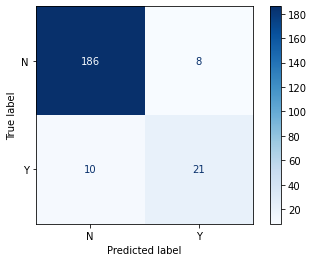

In [5]:
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import RandomOverSampler

lr_pipe = Pipeline([
    ('cv', CountVectorizer(stop_words='english')),
    ('ros', RandomOverSampler(random_state=42)),
    ('lr', LogisticRegression(max_iter=10_000))
])

parameters = {
    'cv__min_df': (1,2,3),
    'cv__ngram_range': ((1, 1), (1, 2), (2,2)),
    'ros__sampling_strategy': [.25, .5, .75, 1],
    'lr__C': [0.25, 0.5, 0.75, 1.0]}
    

lr_imb = GridSearchCV(lr_pipe, param_grid = parameters, n_jobs=-1)
lr_imb.fit(X_train, y_train)

print('lr_imb best params : ', lr_imb.best_params_)

lr_cr = classification_report(y_test, lr_imb.predict(X_test))
print("Classification Report:")
print(lr_cr)

ConfusionMatrixDisplay.from_estimator(lr_imb, X_test, y_test, cmap='Blues');

<br>

### Balancing with Random Forest Classifier - Random Oversampling

rfc_imb best params :  {'cv__min_df': 1, 'cv__ngram_range': (1, 1), 'rfc__max_depth': None, 'rfc__min_samples_leaf': 1, 'rfc__n_estimators': 300, 'ros__sampling_strategy': 0.75}
Classification Report:
              precision    recall  f1-score   support

           N       0.94      0.97      0.96       194
           Y       0.80      0.65      0.71        31

    accuracy                           0.93       225
   macro avg       0.87      0.81      0.84       225
weighted avg       0.93      0.93      0.93       225



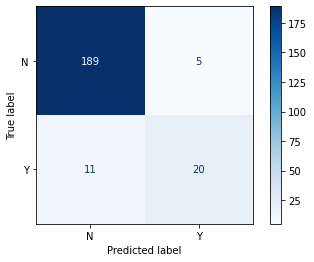

In [6]:
rfc_pipe = Pipeline([
    ('cv', CountVectorizer(stop_words='english')),
    ('ros', RandomOverSampler(random_state=42)),
    ('rfc', RandomForestClassifier(random_state=42))
])

parameters = {
    'cv__min_df': (1,2,3),
    'cv__ngram_range': ((1, 1), (1, 2), (2,2)),
    'ros__sampling_strategy': [.25, .5, .75, 1],
    'rfc__n_estimators': (300, 500),
    'rfc__max_depth': (None, 3, 5),
    'rfc__min_samples_leaf': (1, 3)
}


rfc_imb = GridSearchCV(rfc_pipe, param_grid = parameters, n_jobs=-1)
rfc_imb.fit(X_train, y_train)

print('rfc_imb best params : ', rfc_imb.best_params_)

rfc_cr = classification_report(y_test, rfc_imb.predict(X_test))
print("Classification Report:")
print(rfc_cr)

ConfusionMatrixDisplay.from_estimator(rfc_imb, X_test, y_test, cmap='Blues');

<br>

### Balancing with Multinomial Naive Bayes - Random Oversampling

mnb_imb best params :  {'cv__min_df': 1, 'cv__ngram_range': (1, 1), 'mnb__alpha': 0.1, 'ros__sampling_strategy': 0.25}
Classification Report:
              precision    recall  f1-score   support

           N       0.95      0.94      0.95       194
           Y       0.67      0.71      0.69        31

    accuracy                           0.91       225
   macro avg       0.81      0.83      0.82       225
weighted avg       0.91      0.91      0.91       225



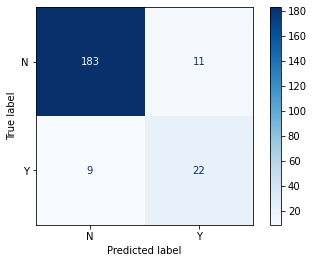

In [7]:
mnb_pipe = Pipeline([
    ('cv', CountVectorizer(stop_words='english')),
    ('ros', RandomOverSampler(random_state=42)),
    ('mnb', MultinomialNB())
])

parameters = {
    'cv__min_df': (1,2,3),
    'cv__ngram_range': ((1, 1), (1, 2), (2,2)),
    'ros__sampling_strategy': [.25, .5, .75, 1],
    'mnb__alpha': [0.01, 0.05, 0.1]
}

mnb_imb = GridSearchCV(mnb_pipe, param_grid = parameters, n_jobs=-1)
mnb_imb.fit(X_train, y_train)

print('mnb_imb best params : ', mnb_imb.best_params_)

mnb_cr = classification_report(y_test, mnb_imb.predict(X_test))
print("Classification Report:")
print(mnb_cr)

ConfusionMatrixDisplay.from_estimator(mnb_imb, X_test, y_test, cmap='Blues');

I expected that using a balancing technique (especially including this technique within the gridsearching) would give me even better results among the success metrics I was interested in - F1-score and Recall, but that doesn't seem to be the case.